In [255]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [256]:
df=pd.read_csv('/content/garments_worker_productivity.csv')

In [257]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [258]:
corrmatrix = df.corr(numeric_only=True)

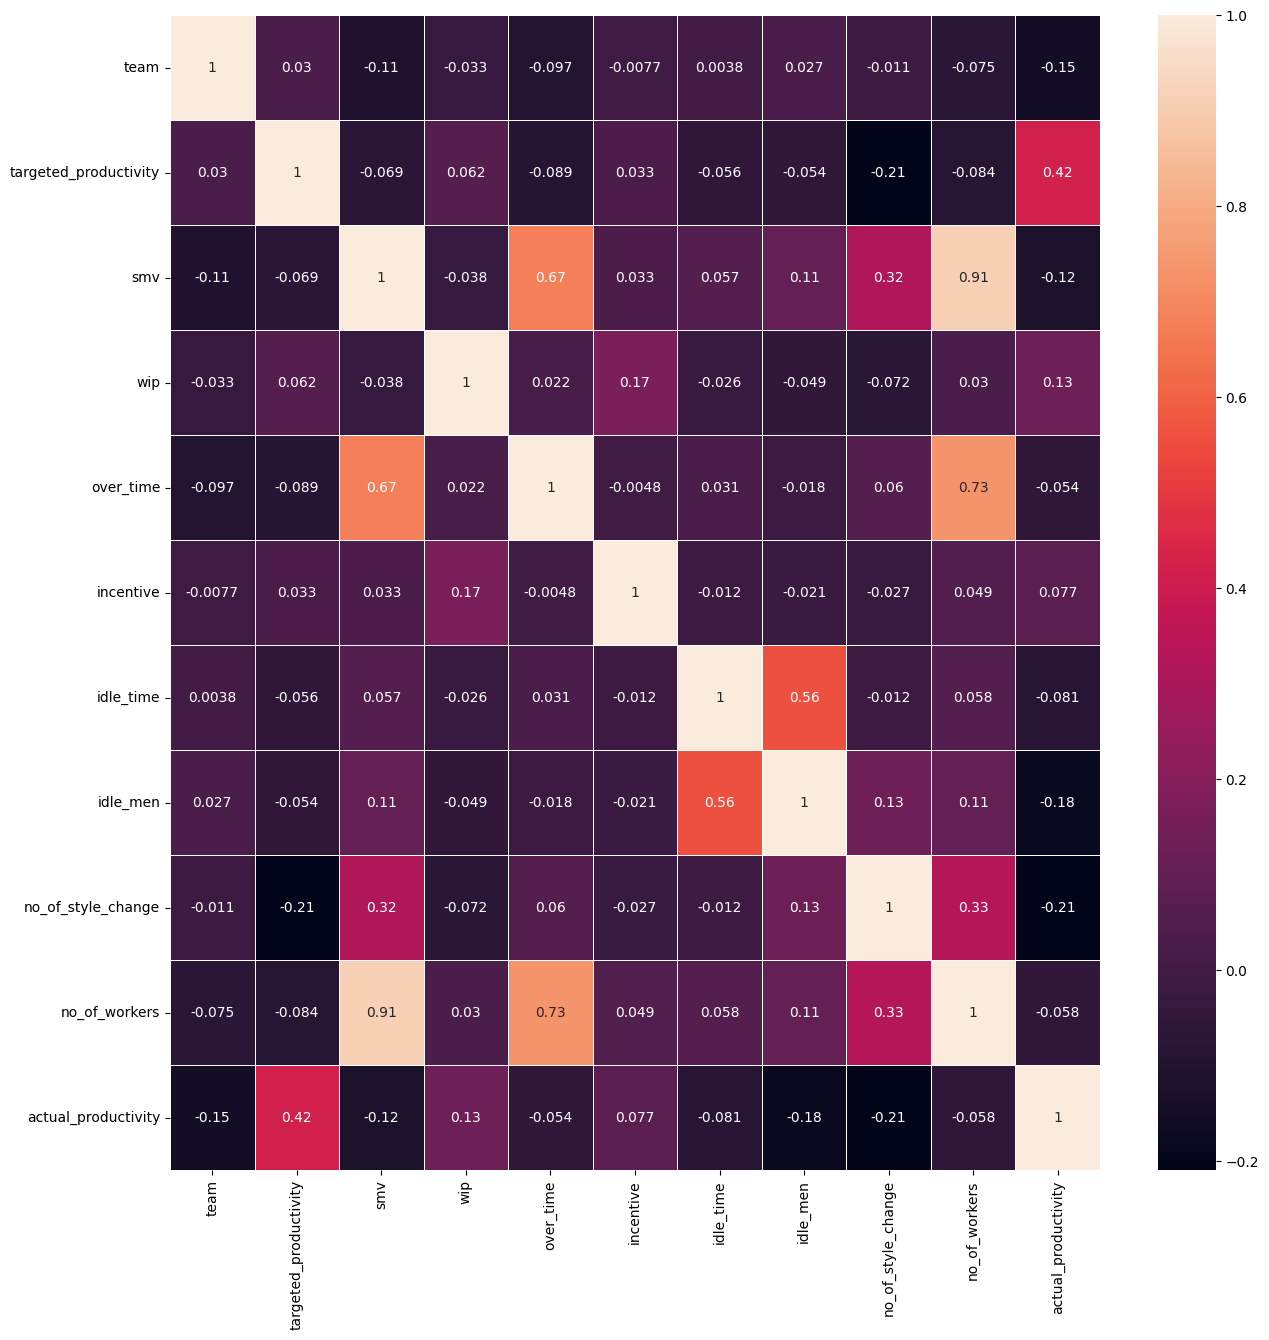

In [259]:
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmatrix,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [260]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [262]:
df['quarter'].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,248
Quarter3,210
Quarter5,44


In [263]:
# Mapping each quarter to an integer
quarter_map = {
    'Quarter1': 1,
    'Quarter2': 2,
    'Quarter3': 3,
    'Quarter4': 4,
    'Quarter5': 5  # Assuming Quarter5 is valid or indicates extended period
}

# Apply the mapping
df['quarter'] = df['quarter'].map(quarter_map)
df['quarter'] = df['quarter'].astype('int8')

In [264]:
df['quarter'].value_counts()

,count
quarter,
1,360
2,335
4,248
3,210
5,44


In [265]:
df['date'] = pd.to_datetime(df['date'])
df['department'] = df['department'].apply(lambda x: 'finishing' if x.replace(" ", "").lower() == 'finishing' else 'sweing')


In [266]:
for col in ['quarter', 'day']:
    df[col] = df[col].astype('category')

In [267]:
df['department'].value_counts()

,count
department,
sweing,691
finishing,506


In [268]:
df['department'].value_counts()

,count
department,
sweing,691
finishing,506


In [269]:
df['date'] = pd.to_datetime(df['date'])  # Ensure it's in datetime format
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop('date', axis=1, inplace=True)


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   quarter                1197 non-null   category
 1   department             1197 non-null   object  
 2   day                    1197 non-null   int32   
 3   team                   1197 non-null   int64   
 4   targeted_productivity  1197 non-null   float64 
 5   smv                    1197 non-null   float64 
 6   wip                    691 non-null    float64 
 7   over_time              1197 non-null   int64   
 8   incentive              1197 non-null   int64   
 9   idle_time              1197 non-null   float64 
 10  idle_men               1197 non-null   int64   
 11  no_of_style_change     1197 non-null   int64   
 12  no_of_workers          1197 non-null   float64 
 13  actual_productivity    1197 non-null   float64 
 14  month                  1197 non-null   i

In [271]:
df['team'] = df['team'].astype('category').cat.codes.astype('int8')

In [272]:
df.drop(['wip'],axis=1,inplace=True)

In [273]:
mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
data = mcle.fit_transform(df)

In [274]:
x= data.drop(['actual_productivity'],axis=1)
y=data['actual_productivity']

In [275]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [276]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [277]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [278]:
print(data.dtypes)

quarter                  category
department                  int64
day                         int32
team                         int8
targeted_productivity     float64
smv                       float64
over_time                   int64
incentive                   int64
idle_time                 float64
idle_men                    int64
no_of_style_change          int64
no_of_workers             float64
actual_productivity       float64
month                       int32
dtype: object


In [279]:
pred_test=model_lr.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.02078844557126081
test_MAE: 0.10448305598035801
R2_score:0.27969292587509365


In [280]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,max_depth=5)


In [281]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [282]:
pred_test=model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.015305824793900991
test_MAE: 0.08385008171265579
R2_score:0.46966242201366204


In [283]:
import xgboost as xgb
import xgboost as xgb

model_xgb = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    enable_categorical=True
)
model_xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [284]:
pred_test=model_xgb.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.01578423162540565
test_MAE: 0.07838142001891568
R2_score:0.4530859144599234


In [285]:
pred_train=model_xgb.predict(x_train)
print("test_MSE:",mean_squared_error(y_train, pred_train))
print("test_MAE:",mean_absolute_error(y_train, pred_train))
print("R2_score:{}".format(r2_score(y_train, pred_train)))

test_MSE: 0.002600798400789152
test_MAE: 0.030716651996516665
R2_score:0.9163249266640474


In [290]:
import joblib
model = pickle.load(open('gwp_xg.pkl', 'rb'))  #

In [292]:
model = pickle.load(open('gwp_rf.pkl', 'rb'))  #

UnpicklingError: STACK_GLOBAL requires str

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   quarter                1197 non-null   category
 1   department             1197 non-null   int64   
 2   day                    1197 non-null   int32   
 3   team                   1197 non-null   int8    
 4   targeted_productivity  1197 non-null   float64 
 5   smv                    1197 non-null   float64 
 6   over_time              1197 non-null   int64   
 7   incentive              1197 non-null   int64   
 8   idle_time              1197 non-null   float64 
 9   idle_men               1197 non-null   int64   
 10  no_of_style_change     1197 non-null   int64   
 11  no_of_workers          1197 non-null   float64 
 12  actual_productivity    1197 non-null   float64 
 13  month                  1197 non-null   int32   
dtypes: category(1), float64(5), int32(2), in